## Dataset Details

- **Name**: 30000 Spotify Songs
- **Source**: Kaggle, JOAKIM ARVIDSSON
- **URL**: [Kaggle Dataset]https://www.kaggle.com/datasets/joebeachcapital/30000-spotify-songs/data
- **License**: Its license type is Database: Open Database, Contents: Database Contents, the Licensor grants to us a worldwide, royalty-free, non-exclusive, perpetual, irrevocable copyright license to do any act that is restricted by copyright over anything within the Contents, whether in the original medium or any other. We can copy, modify, distribute and perform the work, even for commercial purposes, all without asking permission. https://opendatacommons.org/licenses/dbcl/1-0/
- **Size**: The dataset spotify_songs.csv has a size of approximately 27.98 MB and contains 32,833 items (rows).

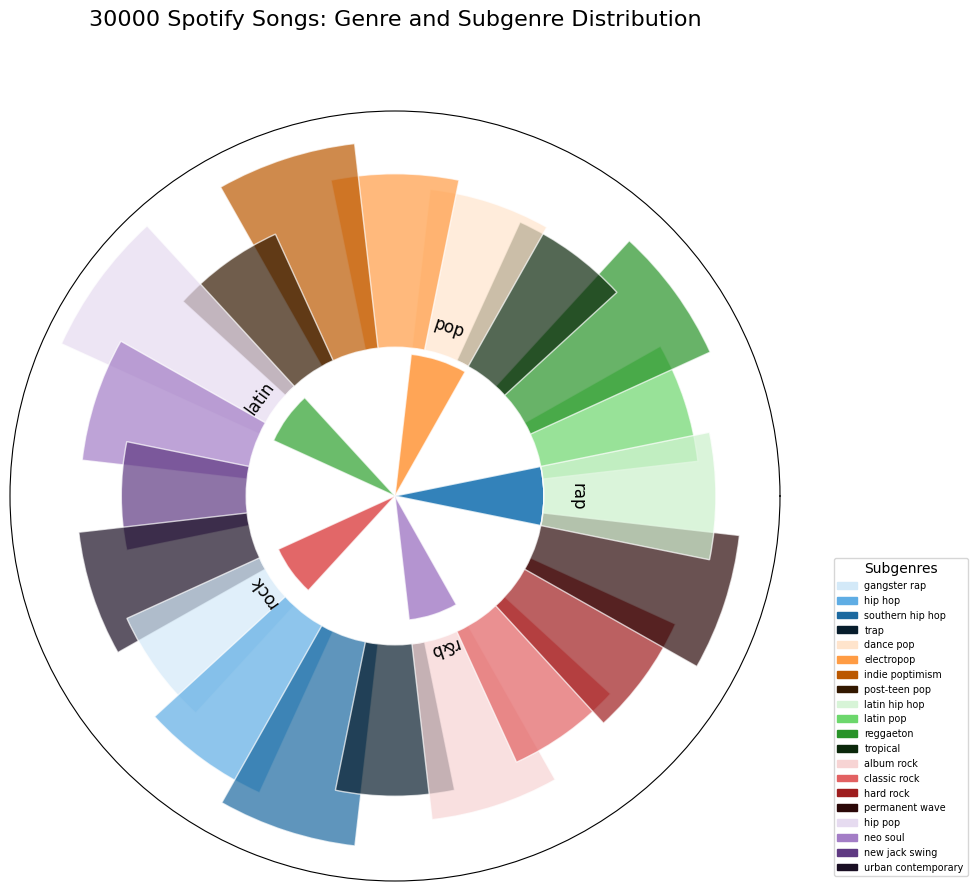

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import colorsys
from matplotlib.patches import Patch

# Define the function to create distinct color shades
def create_contrast_shades(base_color, num_shades):
    hls_base_color = colorsys.rgb_to_hls(*base_color)
    return [colorsys.hls_to_rgb(hls_base_color[0], 1 - (0.1 + (i / (num_shades - 1)) * 0.8), hls_base_color[2]) for i in range(num_shades)]

file_path = r'spotify_songs.csv'
df = pd.read_csv(file_path)

genre_counts = df['playlist_genre'].value_counts()
subgenre_counts = df.groupby(['playlist_genre', 'playlist_subgenre']).size()

# Normalize the values for plotting
def normalize_values(values):
    total = sum(values)
    return [value / total for value in values]

inner_layer_values = normalize_values(genre_counts.values)
outer_layer_values = []
for genre in genre_counts.index:
    subgenre_values = normalize_values(subgenre_counts[genre].values)
    outer_layer_values.extend(subgenre_values)

# Map genres to colors
genres = genre_counts.index.tolist()
colors = plt.cm.tab10(range(len(genres)))
genre_color_map = dict(zip(genres, colors))

# Map subgenres to shades
subgenre_color_map = {}
for genre in genres:
    subgenres = subgenre_counts[genre].index.tolist()
    base_color = genre_color_map[genre][:3]
    shades = create_contrast_shades(base_color, len(subgenres))
    subgenre_color_map.update(dict(zip(subgenres, shades)))

# Plotting the chart
fig, ax = plt.subplots(subplot_kw=dict(polar=True), figsize=(12, 10))

# Inner layer with labels
angles_inner = np.linspace(0, 2 * np.pi, len(inner_layer_values), endpoint=False).tolist()
angles_inner += angles_inner[:1]
inner_values = inner_layer_values + inner_layer_values[:1]
bars_inner = ax.bar(angles_inner, inner_values, width=0.4, color=[genre_color_map[genre] for genre in genres], alpha=0.7, edgecolor='white')

# Add genre labels on the bars
for bar, label in zip(bars_inner, genres):
    rotation = (bar.get_x() + bar.get_width() / 2) * 180 / np.pi - 90
    ax.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.05, label, ha='center', va='center',
            rotation=rotation, rotation_mode='anchor', color='black', fontsize=12)

# Outer layer
outer_layer_colors = [subgenre_color_map[subgenre] for subgenre in subgenre_counts.index.get_level_values(1)]
angles_outer = np.linspace(0, 2 * np.pi, len(outer_layer_values), endpoint=False).tolist()
angles_outer += angles_outer[:1]
outer_values = outer_layer_values + outer_layer_values[:1]
bars_outer = ax.bar(angles_outer, outer_values, width=0.4, bottom=inner_layer_values[0], color=outer_layer_colors, alpha=0.7, edgecolor='white')

# Customizations
ax.set_xticks([])
ax.set_yticks([])
ax.set_title('30000 Spotify Songs: Genre and Subgenre Distribution', y=1.1, fontsize=16)

# Adding the legend for subgenres with corresponding color
subgenre_patches = [Patch(color=color, label=label) for label, color in subgenre_color_map.items()]
plt.legend(handles=subgenre_patches, loc='lower right', bbox_to_anchor=(1.25, 0), title="Subgenres", fontsize='x-small')

plt.show()


In [ ]:
# Top 100 Most Popular Artists - Circular Sound Wave Visualization with Gradient

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap

file_path = r'spotify_songs.csv'
df = pd.read_csv(file_path)

artist_popularity = df.groupby('track_artist')['track_popularity'].mean().reset_index()

sorted_artists_popularity = artist_popularity.sort_values(by='track_artist').reset_index(drop=True)

num_artists = len(sorted_artists_popularity)
angles = np.linspace(0, 2 * np.pi, num_artists, endpoint=False).tolist()
angles += angles[:1]

popularity = sorted_artists_popularity['track_popularity'] / sorted_artists_popularity['track_popularity'].max()
popularity = popularity.tolist()
popularity += popularity[:1]

top_10_artists = sorted_artists_popularity.sort_values(by='track_popularity', ascending=False).head(10)

colors = ["blue", "purple"]
cmap_name = 'blue_to_purple'
cm = LinearSegmentedColormap.from_list(cmap_name, colors, N=num_artists)

norm = plt.Normalize(0, 1)

fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))

for i in range(num_artists):
    norm_color = cm(norm(popularity[i]))
    ax.fill_between(angles[i:i+2], 0, popularity[i:i+2], color=norm_color, alpha=0.7)

ax.plot(angles, popularity, color='blue', linewidth=2)

for index, row in top_10_artists.iterrows():
    angle = angles[sorted_artists_popularity.index.get_loc(index)]
    if angle > np.pi:
        alignment = "right"
    else:
        alignment = "left"
    ax.text(angle, row['track_popularity'] + 0.05, row['track_artist'], horizontalalignment=alignment, size=10, color='black', weight='bold')

ax.set_xticklabels([])
ax.set_yticklabels([])
ax.spines['polar'].set_visible(False)

ax.set_title('Top 100 Most Popular Artists - Circular Sound Wave Visualization with Gradient', size=20)

plt.show()


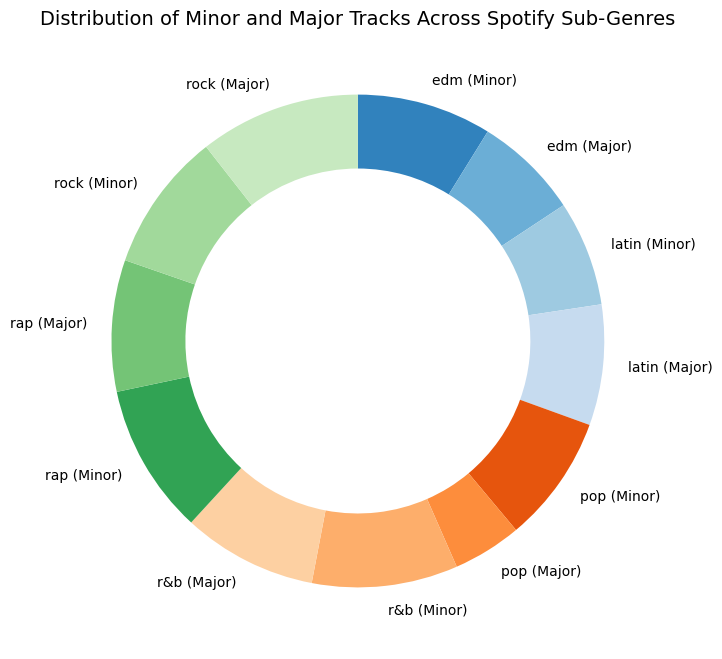

In [2]:
import pandas as pd
import matplotlib.pyplot as plt


file_path = r'spotify_songs.csv'
df = pd.read_csv(file_path)

genre_mode_counts = df.groupby(['playlist_genre', 'mode']).size().unstack(fill_value=0)

sub_genres = genre_mode_counts.index.tolist()

minor_counts = genre_mode_counts[0]
major_counts = genre_mode_counts[1]

labels = []
for genre in sub_genres:
    labels.extend([f"{genre} (Minor)", f"{genre} (Major)"])

colors_minor = plt.cm.tab20c(range(0, len(sub_genres)*2, 2))
colors_major = plt.cm.tab20c(range(1, len(sub_genres)*2, 2))
colors = [val for pair in zip(colors_minor, colors_major) for val in pair]

fig, ax = plt.subplots(figsize=(12, 8))
ax.pie(list(minor_counts) + list(major_counts), labels=labels, colors=colors, startangle=90, counterclock=False, wedgeprops=dict(width=0.3))
ax.set_title('Distribution of Minor and Major Tracks Across Spotify Sub-Genres', fontsize=14)

plt.show()
